In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Simulación de datos ficticios basados en el CSV
np.random.seed(42)
n = 1000  # Número de clientes simulados

data = pd.DataFrame({
    "Cliente": range(1, n + 1),
    "Propension_Compra": np.random.uniform(0, 100, n),  # Propensión inicial
})


In [5]:
# Clasificación de propensión de compra
bins = [0, 20, 40, 60, 80, 100]
labels = ["Muy baja", "Baja", "Media", "Alta", "Muy alta"]
data["Segmento"] = pd.cut(data["Propension_Compra"], bins=bins, labels=labels, right=False)

# Simulación de impacto de estrategia de marketing (incremento en propensión)
data["Impacto_Marketing"] = np.random.uniform(5, 20, n)  # Mejora esperada

# Nueva propensión después de aplicar estrategia
data["Propension_Compra_Post"] = np.clip(data["Propension_Compra"] + data["Impacto_Marketing"], 0, 100)
data["Segmento_Post"] = pd.cut(data["Propension_Compra_Post"], bins=bins, labels=labels, right=False)

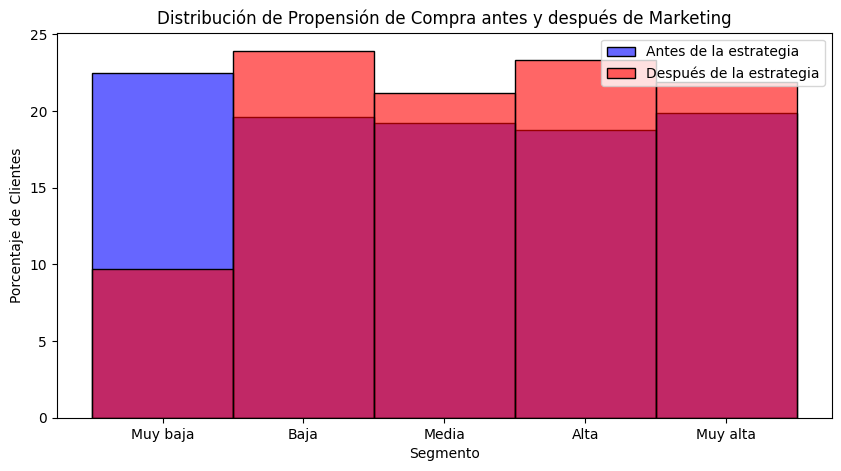

In [6]:
# Gráfico 1: Distribución antes y después de la estrategia
plt.figure(figsize=(10, 5))
sns.histplot(data["Segmento"], label="Antes de la estrategia", color="blue", alpha=0.6, stat="percent")
sns.histplot(data["Segmento_Post"], label="Después de la estrategia", color="red", alpha=0.6, stat="percent")
plt.title("Distribución de Propensión de Compra antes y después de Marketing")
plt.xlabel("Segmento")
plt.ylabel("Porcentaje de Clientes")
plt.legend()
plt.show()

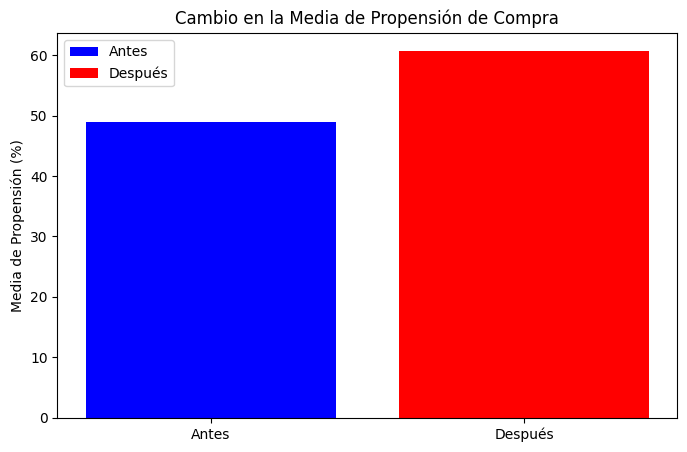

In [7]:
# Gráfico 2: Cambio en la media de propensión
plt.figure(figsize=(8, 5))
mean_before = data["Propension_Compra"].mean()
mean_after = data["Propension_Compra_Post"].mean()
plt.bar(["Antes"], [mean_before], color="blue", label="Antes")
plt.bar(["Después"], [mean_after], color="red", label="Después")
plt.title("Cambio en la Media de Propensión de Compra")
plt.ylabel("Media de Propensión (%)")
plt.legend()
plt.show()

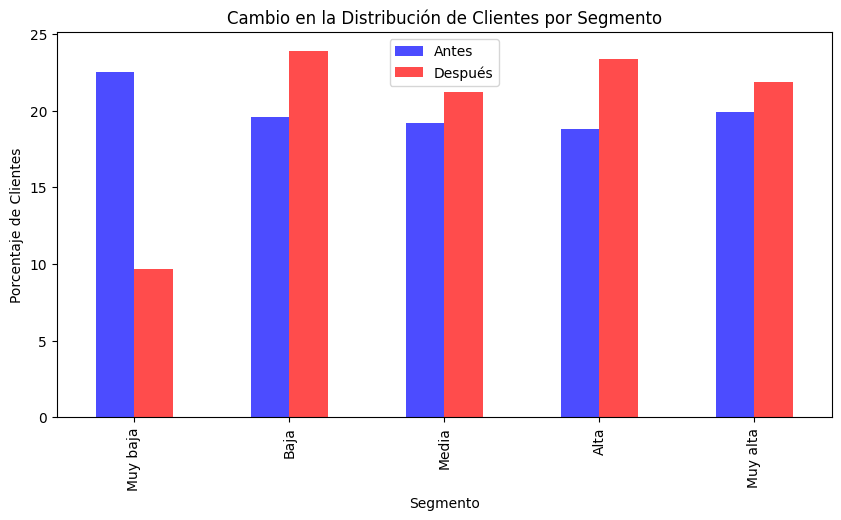

In [8]:
# Gráfico 3: Incremento de clientes en cada categoría tras la estrategia
segment_counts_before = data["Segmento"].value_counts(normalize=True) * 100
segment_counts_after = data["Segmento_Post"].value_counts(normalize=True) * 100

comparison = pd.DataFrame({"Antes": segment_counts_before, "Después": segment_counts_after}).sort_index()
comparison.plot(kind="bar", figsize=(10, 5), color=["blue", "red"], alpha=0.7)
plt.title("Cambio en la Distribución de Clientes por Segmento")
plt.ylabel("Porcentaje de Clientes")
plt.xlabel("Segmento")
plt.legend()
plt.show()
